<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PRACTICA5/P5_Python_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr"></p>

<h1><b>Práctica 5: Introducción al análisis frecuencial de señales
</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

#<b>Procedimiento</b>

<h4>Los ítems descritos a continuación deben ser desarrollados y entregados por los equipos de trabajo.</h4>

<u><b>Representación de señales</b></u>

Como ejemplo de señal discreta utilizaremos la señal analógica $x_a(t) = Asin(2πF_0t)$ con $F_0 = 40 Hz$ (frecuencia fundamental de la señal), $A = 5V$ (amplitud), y muestreada a $F_s = 1000 Hz$ ($T = 0.001 s$).

El periodo de la señal analógica o en tiempo continuo es $T_p = 0,025 s$, y en tiempo discreto es $N = 25$ (muestras).

La señal $x_1(n)$ se ha generado mediante la pulsación de oscilación en tiempo discreto $f_0 = 0,04 \: muestras/s$. La única diferencia respecto al anterior es que en este último caso el período de muestreo T “manipula” la pulsación original $F_0$ y se considera como eje temporal la sucesión de números enteros correspondiente a los instantes de muestreo. En todo caso, el resultado es el mismo, pues gráficamente se observa que ambas señales $x(t)$ y $x_1(n)$ coinciden, la única diferencia radica en que la evolución de las muestras se escala con la abscisa de tiempo en segundos $t \in \mathbb{R}$ en el primer caso, y con la abscisa de número de muestras $n \in \mathbb{N}$ en el segundo caso.

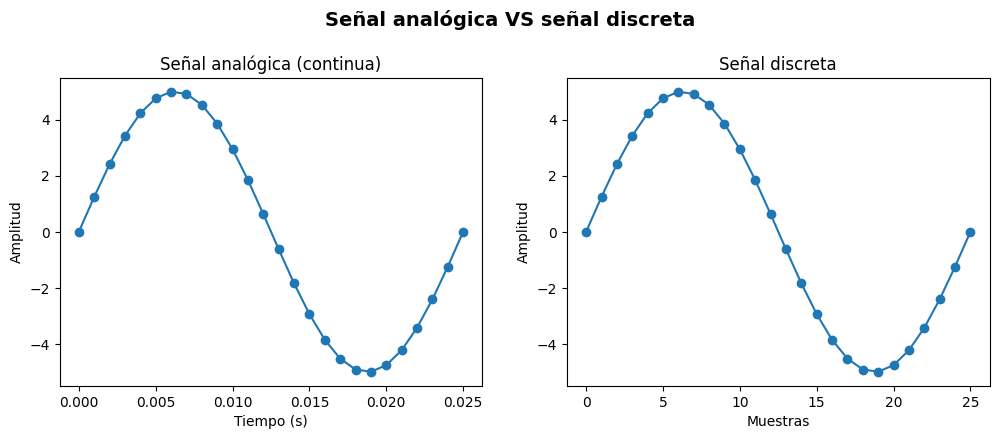

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Señal analógica VS señal discreta', x=0.5, y=1.05, fontsize=14, fontweight='bold')
Fo = 40
Tp = 1/Fo
Fs = 1000
T = 1/Fs
t = np.arange(0, Tp+T, T)
A = 5
x = A*np.sin(2*np.pi*Fo*t)
axs[0].plot(t, x, marker='o')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].set_title('Señal analógica (continua)')

fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
axs[1].plot(n, x1, marker='o')
axs[1].set_xlabel('Muestras')
axs[1].set_ylabel('Amplitud')
axs[1].set_title('Señal discreta')
plt.show()

<h4><b>a)</b> Compruebe que los valores de las primeras cinco muestras son los mismos.</h4>

Para comprobar que las 5 primeras muestras de $x$ y $x_1$ son idénticas se calculó la resta de los elementos. Las operaciones resultaron en un error de 0, lo que implica que son iguales.

In [34]:
error = x[:5] - x1[:5]
print(f'Error primeras 5 muestras de x y x1: {error}')

Error primeras 5 muestras de x y x1: [0. 0. 0. 0. 0.]


<u><b>Energía y potencia en el dominio del tiempo</b></u>

La energía medida en $V^2$ o $W \cdot s$, la potencia media de la señal medida en $W$, y el valor cuadrático medio es la raíz cuadrada de la potencia, considerando tanto un ciclo de la señal $x(n)$ como 10 ciclos de la sinusoide (250ms), se pueden hallar de la siguiente manera:

In [36]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)

t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)

energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)

<h4><b>b)</b> ¿La potencia es la misma que en $x(n)$? ¿Por qué?</h4>

Para determinar si las potencias son iguales en un ciclo de $x(n)$ o 10 ciclos, se deben restar ambos valores de potencia. La diferencia resulta en un valor despreciable, por lo que se puede concluir que las potencias son iguales.

In [39]:
error_potencia = np.abs(potencia - potencia10)
print(f'Error potencias en 1 ciclo y 10 ciclos: {error_potencia}')

Error potencias en 1 ciclo y 10 ciclos: 3.552713678800501e-15


#<b>Aplicación</b>

<h4>Los ítems descritos a continuación deben ser desarrollados y entregados por los equipos de trabajo. Adjuntar conclusiones y referencias. Recuerde entregar el archivo ipynb, con el desarrollo punto a punto de esta aplicación, incluyendo los enunciados.</h4>

<h4><b>1.</b> Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente.</h4>

La frecuencia de muestreo se define apartir de la frecuencia máxima de la señal. En este caso la frecuencia máxima es de 160 Hz, y para representar la señal como una curva con resolución adecuada se toma el cuadrado de esta frecuencia máxima (la resolución óptima se alcanza con una frecuencia de muestreo menor, que se obtiene sumando 5000 al doble de la frecuencia máxima). En cuanto a la frecuencia mínima, se puede determinar como el doble de la frecuencia máxima, sin embargo se obtiene una gráfica con poca definición y se pierde información considerable de la forma de la señal.

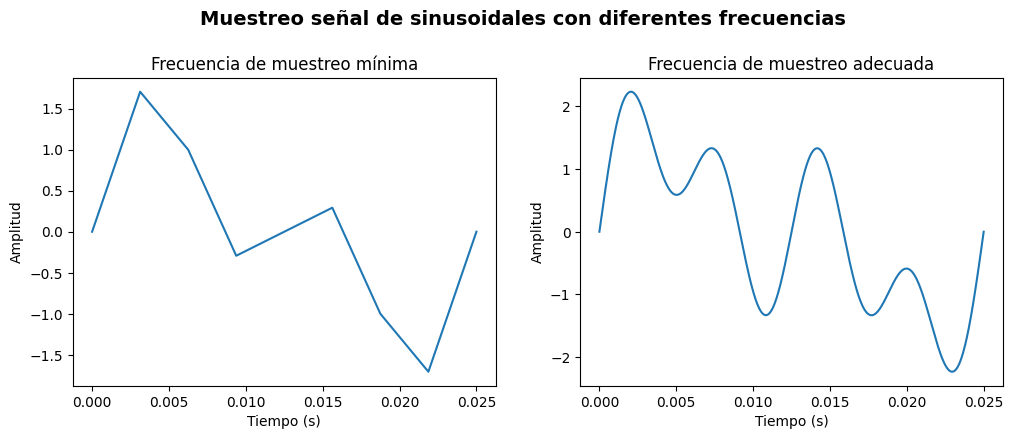

In [94]:
import numpy as np
import matplotlib.pyplot as plt

f = [40, 80, 160]
T_senal = 1/f[0] #El periodo de la señal x se define con la frecuencia menor

#Frecuencia de muestreo mínima
fs_min = max(f)*2
t1 = np.arange(0, T_senal + 1/fs_min, 1/fs_min)

sin_40 = np.sin(2*np.pi*f[0]*t1)
sin_80 = np.sin(2*np.pi*f[1]*t1)
sin_160 = np.sin(2*np.pi*f[2]*t1)
x_fs_min = sin_40 + sin_80 + sin_160

#Frecuencia de muestreo adecuada
fs_adecuada = max(f)**2
t2 = np.arange(0, T_senal + 1/fs_adecuada, 1/fs_adecuada)

sin_40 = np.sin(2*np.pi*f[0]*t2)
sin_80 = np.sin(2*np.pi*f[1]*t2)
sin_160 = np.sin(2*np.pi*f[2]*t2)
x_fs_adecuada = sin_40 + sin_80 + sin_160

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Muestreo señal de sinusoidales con diferentes frecuencias', x=0.5, y=1.05, fontsize=14, fontweight='bold')
axs[0].plot(t1, x_fs_min)
axs[0].set(title='Frecuencia de muestreo mínima', xlabel='Tiempo (s)', ylabel='Amplitud')

axs[1].plot(t2, x_fs_adecuada)
axs[1].set(title='Frecuencia de muestreo adecuada', xlabel='Tiempo (s)', ylabel='Amplitud')
plt.show()

<h4><b>2.</b> Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal).</h4>

Para identificar el espectro de frecuencias que conforman la señal se aplica la transformada discreta (con el método de la FFT) a la señal $x(t)$, y se determina la longitud de muestras de la transformada $X$ resultante. A partir del número de muestras se hallan las frecuencias de la transformada con un periodo de muestreo definido con la frecuencia de muestreo adecuada que se determinó en el numeral anterior.

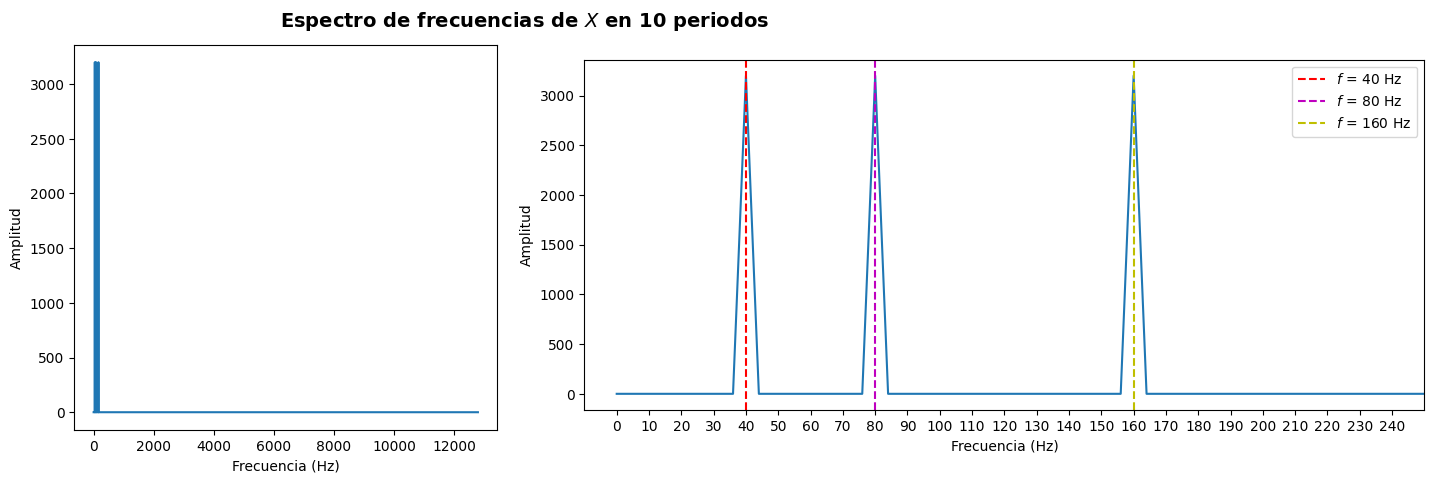

In [123]:
t10 = np.arange(0, 10*T_senal, 1/fs_adecuada) #Tiempo para obtener 10 periodos de la señal
x10 = np.sin(2*np.pi*f[0]*t10) + np.sin(2*np.pi*f[1]*t10) + np.sin(2*np.pi*f[2]*t10)

X = np.fft.fft(x10)
N = len(X)
frequencies = np.fft.fftfreq(N, d=1/fs_adecuada)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Espectro de frecuencias de $X$ en 10 periodos', x=0.5, y=0.95, fontsize=14, fontweight='bold')

axs[0].plot(frequencies[:N//2], np.abs(X)[:N//2]) #Solo se consideran las frecuencias positivas
axs[0].set(xlabel='Frecuencia (Hz)', ylabel='Amplitud')

axs[1].plot(frequencies[:N//2], np.abs(X)[:N//2])
axs[1].set(xlabel='Frecuencia (Hz)', ylabel='Amplitud', xlim=[-10, 250], xticks=np.arange(0, 250, 10), position=[0.55, 0.15, 0.7, 0.7])
axs[1].axvline(f[0], color='r', linestyle='--', label=f'$f$ = {f[0]} Hz')
axs[1].axvline(f[1], color='m', linestyle='--', label=f'$f$ = {f[1]} Hz')
axs[1].axvline(f[2], color='y', linestyle='--', label=f'$f$ = {f[2]} Hz')
axs[1].legend()
plt.show()

<h4><b>3.</b> Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.</h4>

Una función que permite calcular la transformada inversa de Fourier de una señal discreta es la función <i>np.fft.ifft()</i>, la cual recibe como argumento la función discreta y retorna la función continua.

Se calculó la transformada inversa de $X$ y se comparó graficamente con la señal continuo original en 10 periodos de tiempo.

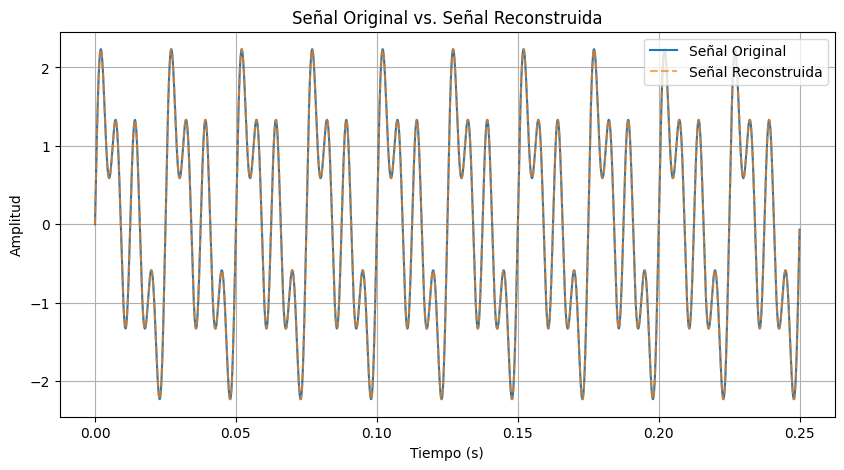

In [124]:
x_continua = np.fft.ifft(X)

plt.figure(figsize=(10, 5))
plt.plot(t10, x10, label='Señal Original')
plt.plot(t10, x_continua.real, linestyle='--', label='Señal Reconstruida', alpha=0.7)
plt.title('Señal Original vs. Señal Reconstruida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

<h4><b>4.</b> ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué?</h4>

```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```
<h4>Extraiga de manera similar cada una de las componentes de la señal.</h4>

El código presentado en el enunciado sí aplica un filtro. Se implementa un filtrado manual de componentes de frecuencia de la transformada $F1$ al seccionar el vector entre los índices 9 y 13, lo cual cuenta como filtrado al eliminar frecuencias de la señal.

Para extraer las componentes de frecuencia de la señal del numeral anterior, se deben identificar los índices de cada frecuencia del espectro. Posteriormente, se asigna a un vector de ceros el valor de la transformada en la frecuencia que se desea conservar, y finalmente se aplica la transformada inversa para reconstruir la señal sinusoidal solo con el componente de frecuencia seleccionado.

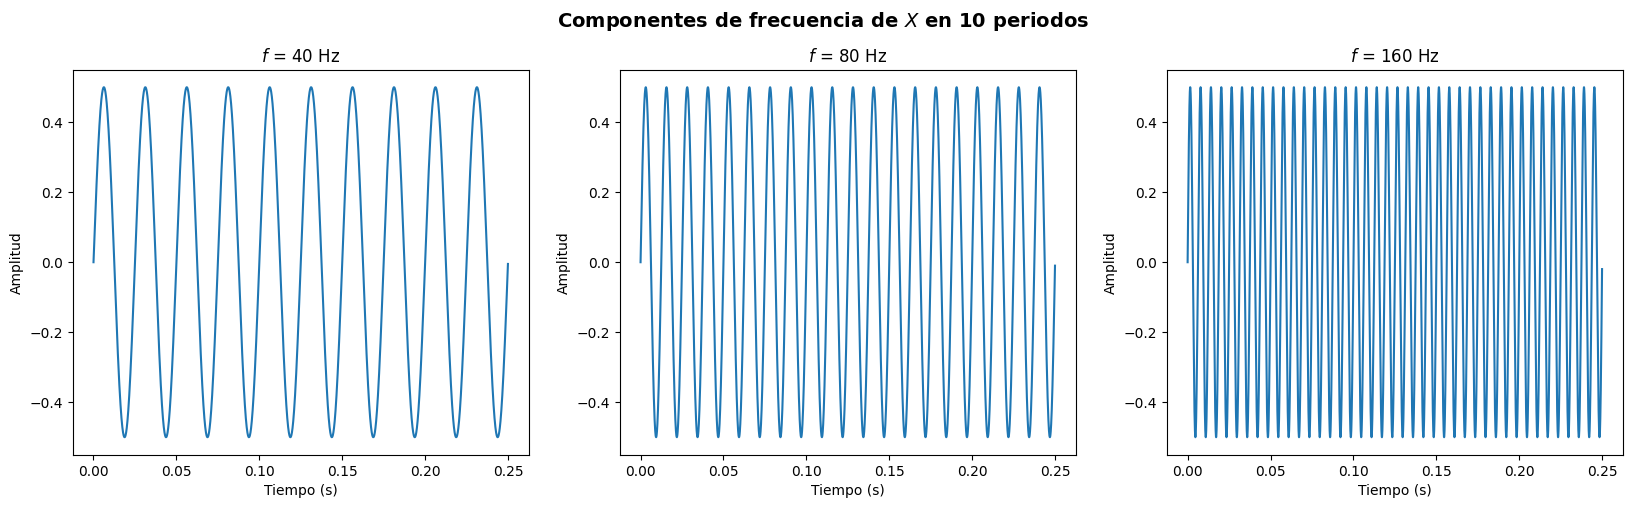

In [135]:
F_40, F_80, F_160 = [np.zeros(len(X), dtype=complex) for _ in range(3)]

index_40 = np.where(frequencies == f[0])[0][0]
index_80 = np.where(frequencies == f[1])[0][0]
index_160 = np.where(frequencies == f[2])[0][0]

F_40[index_40] = X[index_40]
F_80[index_80] = X[index_80]
F_160[index_160] = X[index_160]

xr_40 = np.fft.ifft(F_40)
xr_80 = np.fft.ifft(F_80)
xr_160 = np.fft.ifft(F_160)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Componentes de frecuencia de $X$ en 10 periodos', x=0.5, y=1, fontsize=14, fontweight='bold')

axs[0].plot(t10, np.real(xr_40))
axs[0].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='$f$ = 40 Hz')

axs[1].plot(t10, np.real(xr_80))
axs[1].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='$f$ = 80 Hz')

axs[2].plot(t10, np.real(xr_160))
axs[2].set(xlabel='Tiempo (s)', ylabel='Amplitud', title='$f$ = 160 Hz')
plt.show()

<h4><b>5.</b> El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning y justificar la elección del solapamiento y el ancho de la ventana).</h4>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import scipy.io
import numpy as np
file_path = '/content/drive/My Drive/senecg.mat'
data = scipy.io.loadmat(file_path)
ecg_signal = data['ECG'].flatten()
fs = 250  # Frecuencia de muestreo en Hz

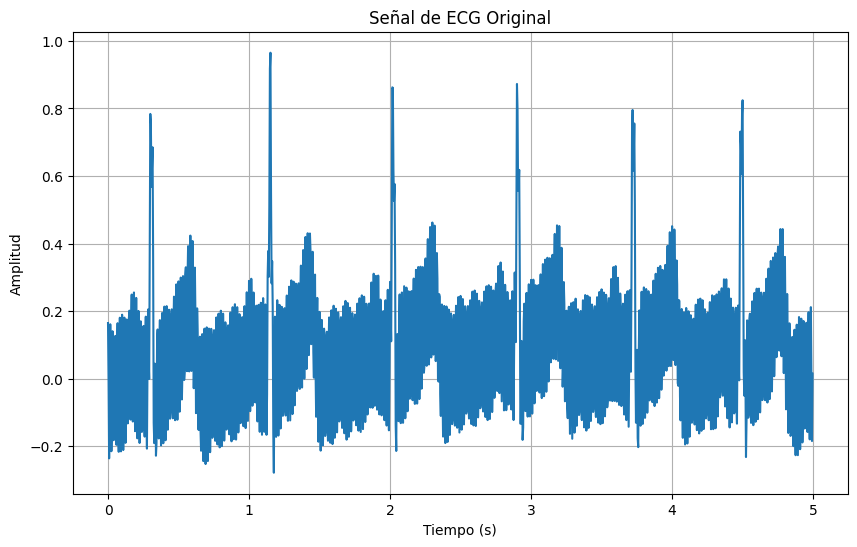

In [ ]:
plt.figure(figsize=(10, 6))
time = np.arange(len(ecg_signal)) / fs  # Generar el vector de tiempo
plt.plot(time, ecg_signal)
plt.title('Señal de ECG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

<b>Periodograma Welch</b>

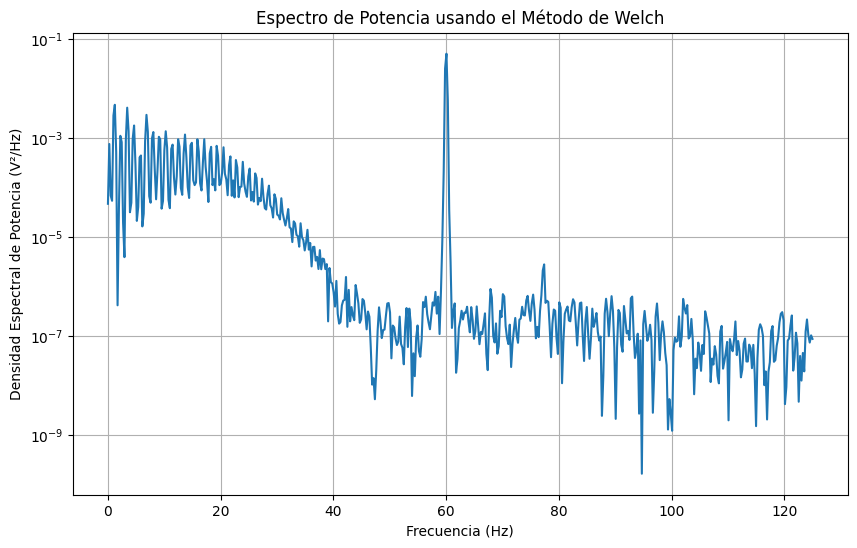

In [ ]:
from scipy.signal import welch

frequencies, psd = welch(ecg_signal, fs, nperseg=1024)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Espectro de potencia con Método de Welch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (V²/Hz)')
plt.grid(True)
plt.show()

<h4><b>6.</b> Realice un análisis de frecuencia a través del periodograma de Welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. (Usar una ventana Hanning y justificar la elección del solapamiento y el ancho de la ventana)</h4>

##<b>Conclusiones</b>

##<b>Referencias</b>